In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!jupyter nbextension enable toc

df=pd.read_csv("~/Desktop/PhD/Amazon/Data/leticia_vbd.csv")
df.columns

cali=pd.read_csv("~/Desktop/PhD/Amazon/Data/cali_consolidado_2006_2021.csv")
cali['location'] = "cali"
cucuta=pd.read_csv("~/Desktop/PhD/Amazon/Data/cucuta_consolidado_2006_2021.csv")
cucuta['location'] = "cucuta"
leticia=pd.read_csv("~/Desktop/PhD/Amazon/Data/leticia_consolidado_2008_2021.csv")
leticia['location']='leticia'
#Amazon streamflow for leticia
sf=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/Data/Leticia_nazareth_streamflow.csv')
print(sf.columns)
sf=sf[['Fecha','Valor']]

#Standardied Precipitation Index, monthly
spi=pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/Data/SPI.csv')
spi.drop('Unnamed: 0',axis=1,inplace=True)

spi['month']=pd.to_datetime(spi.date).dt.month
spi['year']=pd.to_datetime(spi.date).dt.year

medellin=pd.read_csv("~/Desktop/PhD/Amazon/Data/medellin_consolidado_2009_2021.csv")
medellin['location']='medellin'


pop = pd.read_csv('/Users/maxbeal/Desktop/PhD/Amazon/Data/Municipal_area_1985-2020.csv')

ldf=pd.concat([cali,cucuta,leticia,medellin])
ldf['datetime']=pd.to_datetime(ldf['FECHA'])
ldf.set_index('datetime',inplace=True)


sf['Fecha'] = pd.to_datetime(sf['Fecha'])
sf.set_index('Fecha',inplace=True)
sf = sf.resample('1W').mean()
sf.columns=['STREAMFLOW']
sf['location']='leticia'




ldf=pd.merge(ldf,sf,left_index=True,right_index=True,how='left')


Enabling notebook extension toc...
      - Validating: OK
Index(['CodigoEstacion', 'NombreEstacion', 'Latitud', 'Longitud', 'Altitud',
       'Categoria', 'Entidad', 'AreaOperativa', 'Departamento', 'Municipio',
       'FechaInstalacion', 'FechaSuspension', 'IdParametro', 'Etiqueta',
       'DescripcionSerie', 'Frecuencia', 'Fecha', 'Valor', 'Grado',
       'Calificador', 'NivelAprobacion'],
      dtype='object')


[]

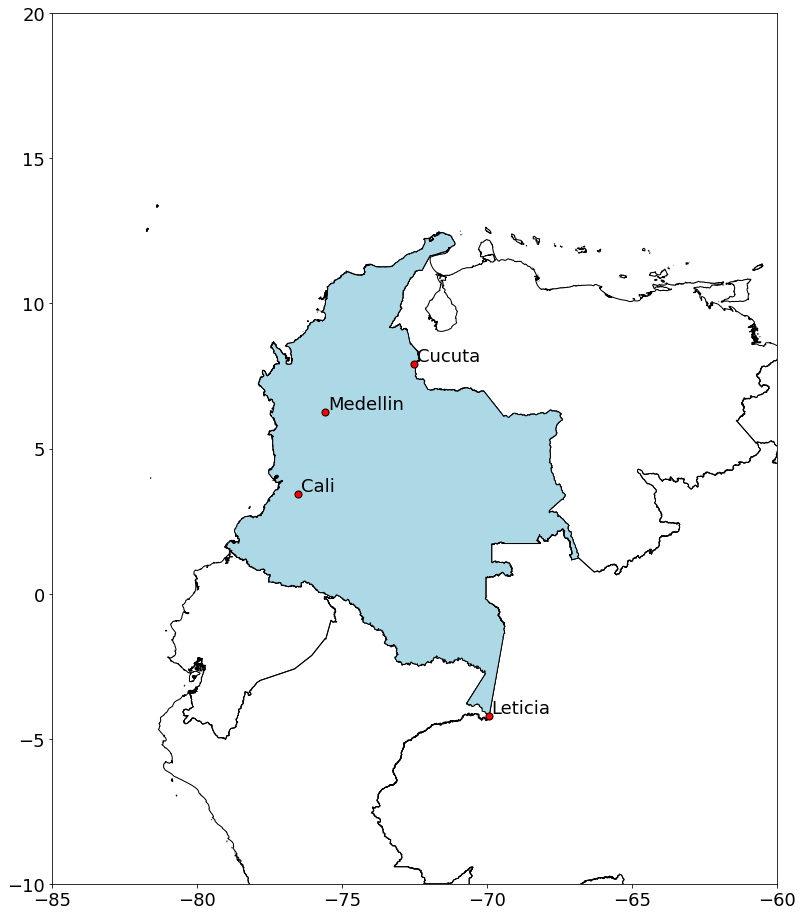

In [4]:
import geopandas as gpd
import pandas as pd
col=gpd.read_file("/Users/maxbeal/Desktop/PhD/Amazon/colombia_shp/col_admbnda_adm0_mgn_itos_20200416.shp") 
sa=gpd.read_file("/Users/maxbeal/Desktop/PhD/Amazon/South_America_shp/SouthAmerica.shp")

cities = pd.DataFrame({'x': [-76.529916,-72.509743 , -69.946317,-75.587740], 'y': [3.444979,7.903487 ,-4.212734 ,6.242832 ], 'name': ['Cali','Cucuta','Leticia','Medellin']})
cities = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities['x'], cities['y']))

plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(13, 20))
sa.plot(ax=ax,facecolor='none')
col.plot(ax=ax,facecolor='lightblue',edgecolor='black')
cities.plot(ax=ax,color='red',markersize=50,edgecolor='black')
for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
ax.set_xlim(-85,-60)
ax.set_ylim(-10,20)
plt.plot()



In [29]:
df

,FECHA,COD_DPTO,COD_MUNICIPIO,POBLACION,ANO,SEMANA,PRECIPITATION,DRY_DAYS,TEMPERATURE_AMAX,REL_HUMIDITY_AMAX,...,CAR,NTA,DENGUE,DENGUE GRAVE,MORTALIDAD POR DENGUE,location_x,STREAMFLOW,location_y,incidence,year_month
datetime,,,,,,,,,,,,,,,,,,,,,
2006-09-03,2006-09-03,54.0,54001,593766.0,2006,36,3.000,5,38.200000,89.000000,...,0.26,0.40,NaN,NaN,NaN,cucuta,17813.285714,leticia,NaN,2006-09
2006-09-10,2006-09-10,54.0,54001,593766.0,2006,37,1.000,6,39.600000,94.000000,...,0.26,0.40,NaN,NaN,NaN,cucuta,16238.142857,leticia,NaN,2006-09
2006-09-17,2006-09-17,54.0,54001,593766.0,2006,38,2.000,6,38.800000,94.000000,...,0.26,0.40,NaN,NaN,NaN,cucuta,14634.428571,leticia,NaN,2006-09
2006-09-24,2006-09-24,54.0,54001,593766.0,2006,39,6.100,6,39.100000,90.000000,...,0.26,0.40,NaN,NaN,NaN,cucuta,15165.142857,leticia,NaN,2006-09
2006-10-01,2006-10-01,54.0,54001,593766.0,2006,40,1.000,6,38.500000,95.000000,...,0.25,0.49,NaN,NaN,NaN,cucuta,14522.285714,leticia,NaN,2006-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-19,2021-12-19,5.0,5001,NaN,2021,51,14.717,4,28.800000,97.000000,...,NaN,NaN,5.0,0.0,0.0,medellin,NaN,NaN,NaN,2021-12
2021-12-26,2021-12-26,76.0,76001,NaN,2021,52,17.500,2,30.811397,93.712061,...,NaN,NaN,46.0,0.0,0.0,cali,NaN,NaN,NaN,2021-12
2021-12-26,2021-12-26,54.0,54001,NaN,2021,52,17.700,1,31.100000,100.000000,...,NaN,NaN,23.0,2.0,0.0,cucuta,NaN,NaN,NaN,2021-12


Temperature, ENSO correlations

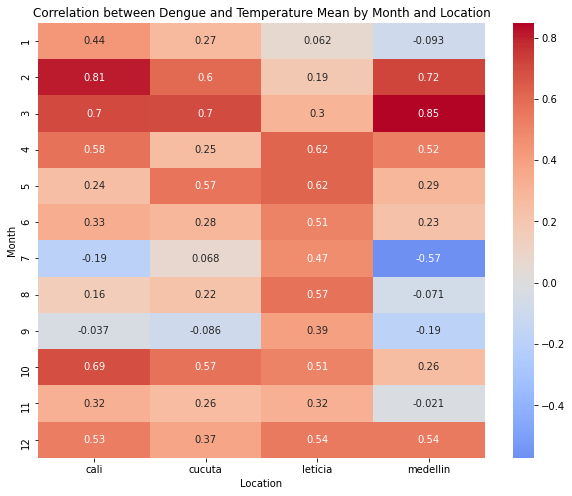

location_x
cali        0.380973
cucuta      0.339716
leticia     0.425651
medellin    0.205629
dtype: float64

In [111]:
import seaborn as sns
df=ldf


var = "TEMPERATURE_MEAN"

hold=[]
for loc in set(df['location_x']):
    dfh= df[df.location_x==loc]
    
    dfh=dfh[["SST3.4",var]].resample("1M").mean()
    dfh['location_x'] = loc
    hold.append(dfh)
    
df = pd.concat(hold)


# Extract year and month for grouping
df['month'] = df.index.month

df['ENSO_lag'] = df.groupby('location_x')[var].shift(6)

df = df.dropna(subset=['ENSO_lag'])

# Group by year_month and location_x
grouped = df.groupby(['month', 'location_x'])



# Function to compute correlations
def compute_correlation(group):
    return group[['ENSO_lag', var]].corr().iloc[0, 1]

# Apply the correlation function to each group
correlations = grouped.apply(compute_correlation).reset_index()
correlations.columns = ['month', 'location_x', 'correlation']

# Pivot the data for heatmap
heatmap_data = correlations.pivot(index='month', columns='location_x', values='correlation')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Dengue and Temperature Mean by Month and Location')
plt.xlabel('Location')
plt.ylabel('Month')
plt.show()

heatmap_data.mean(axis=0)

<ipython-input-28-54d6cc953d9a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold['month']=hold.index.month
<ipython-input-28-54d6cc953d9a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold['year']=hold.index.year
<ipython-input-28-54d6cc953d9a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

<ipython-input-28-54d6cc953d9a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold['month']=hold.index.month
<ipython-input-28-54d6cc953d9a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold['year']=hold.index.year
<ipython-input-28-54d6cc953d9a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

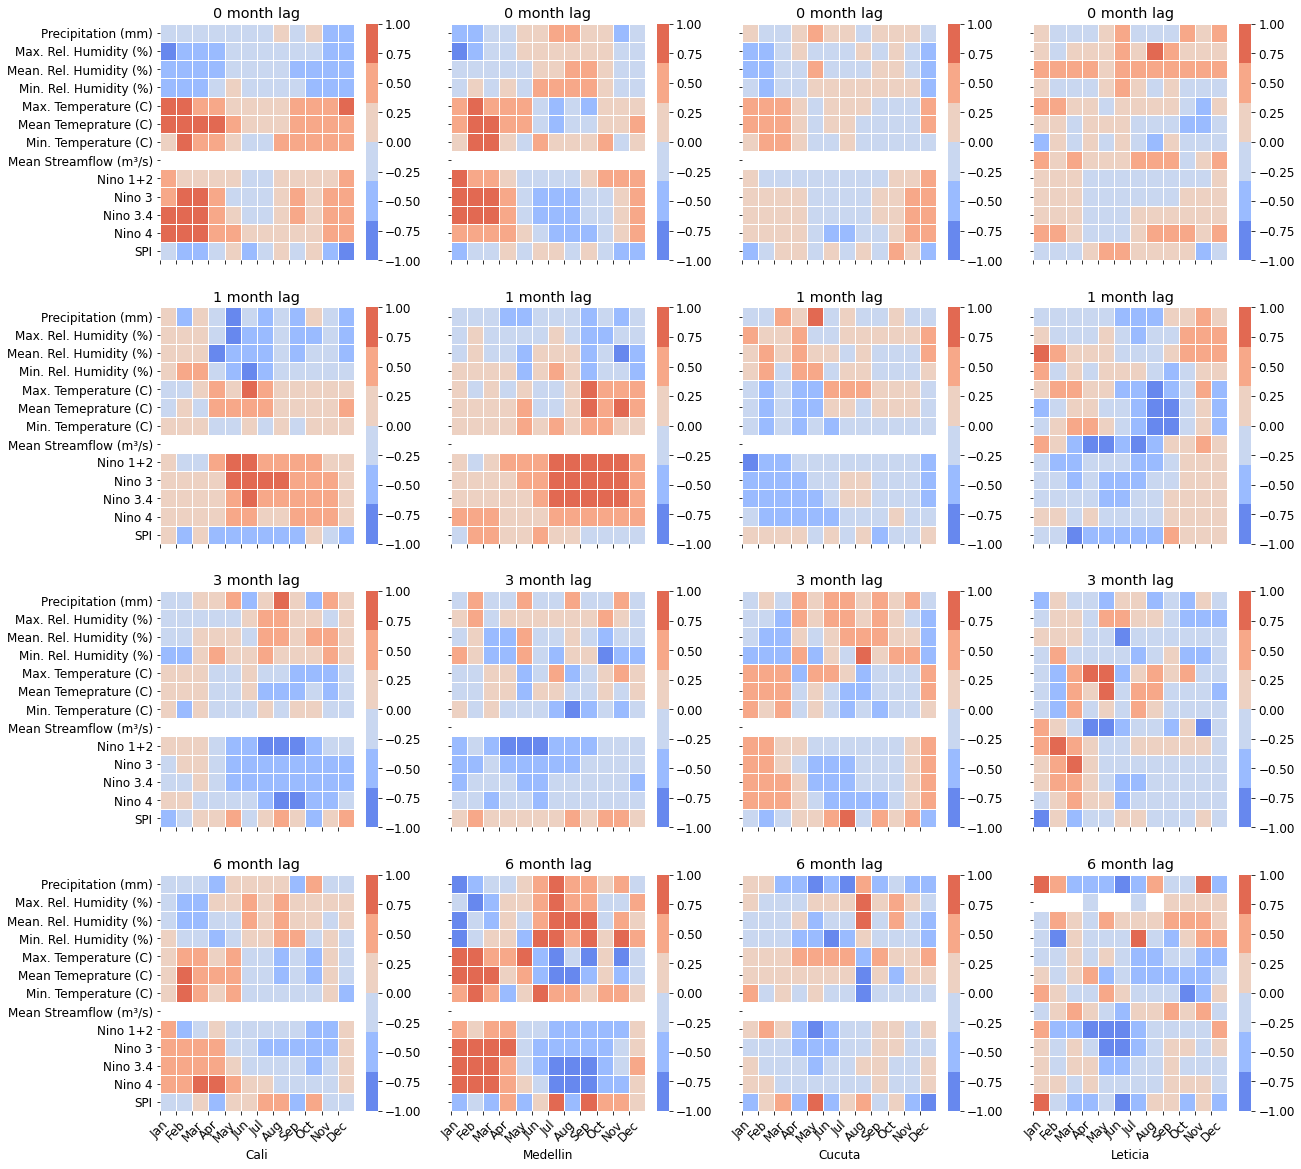

In [28]:
import seaborn as sns
ldf['SSTChange'] = ldf['SST3.4'].shift(-1) - ldf['SST3.4']
ldf['incidence'] = ldf.DENGUE/ldf.POBLACION
df_cmat=ldf[['PRECIPITATION','REL_HUMIDITY_AMAX','REL_HUMIDITY_MEAN', 'REL_HUMIDITY_AMIN','TEMPERATURE_AMAX',
       'TEMPERATURE_MEAN','TEMPERATURE_AMIN','STREAMFLOW', 'SST1+2', 'SST3',
        'SST3.4','SST4','location_x','incidence']]

df_cmat.columns = ['Precipitation (mm)','Max. Rel. Humidity (%)','Mean. Rel. Humidity (%)','Min. Rel. Humidity (%)',
                 'Max. Temperature (C)', 'Mean Temeprature (C)','Min. Temperature (C)', 'Mean Streamflow (m³/s)',
                 'Nino 1+2','Nino 3','Nino 3.4', 'Nino 4', 'location','Incidence']

fig, ax = plt.subplots(nrows=4,ncols=4,figsize=(20,20),sharey=True,sharex='col') 

#df_cmat.rename(columns={'location_x':'location'}, inplace=True)
plt.rcParams.update({'font.size': 12})
for j, X in enumerate([0,1,3,6]):

    corr_matrix=[]
    for city in set(df_cmat.location):
        hold = df_cmat[df_cmat.location==city]
        hold['month']=hold.index.month
        hold['year']=hold.index.year
        hold=pd.merge(hold.reset_index(),spi[['location','month','year','SPI']],on=['location','month','year'],how='left')
        hold.set_index('datetime',inplace=True)
        hold=hold.drop(['location','month','year'],axis=1)
        hold=hold.resample('1M').mean()

        for month in range(1,13):
            hold2=hold[hold.index.month==month]
            variables_to_lag = hold2.columns[hold2.columns != 'Incidence']
            # Lag the selected variables by X months
            lagged_df = hold2[variables_to_lag].shift(X)
            # Include the variable_to_leave_out in the lagged dataframe
            lagged_df['Incidence'] = hold2['Incidence']


            lagged_df.rename(columns={'Incidence':'Incidence'+'_'+str(city)+'_'+str(month)}, inplace=True)
            cors = lagged_df.corr()['Incidence'+'_'+str(city)+'_'+str(month)]
            
            if city!='leticia':
                cors[cors.index=='Mean Streamflow (m³/s)']=np.nan

            
            corr_matrix.append(cors[0:len(cors)-1])


    corr_matrix=pd.concat(corr_matrix,axis=1)

    xtick_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    cityNames = ['cali','medellin','cucuta','leticia']
    for i, name in enumerate(cityNames):
        choose = [x for x in corr_matrix.columns if name in x]
        sns.heatmap(corr_matrix[choose],ax=ax[j,i],linewidths=0.5,cmap=sns.color_palette('coolwarm'),vmin=-1,vmax=1)
        ax[j,i].set_title(str(X)+' month lag')
        ax[3,i].set_xticks(range(len(xtick_names)))
        ax[3,i].set_xticklabels(xtick_names,rotation=45)
        ax[3,i].set_xlabel(name.capitalize())
        
corr_matrix_i = corr_matrix

Select Predictors

In [58]:
import pandas as pd
import numpy as np
from scipy.stats import norm

def correlate_with_confidence(df, variable, confidence_level=0.95):
    """
    Correlate a variable with each column of a pandas dataframe and return
    only the variables correlating at the specified confidence level.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    variable (str): The name of the variable to correlate with.
    confidence_level (float): The desired confidence level. Default is 0.95.

    Returns:
    pandas.DataFrame: Dataframe containing only the variables correlating
                      at the specified confidence level.
    """

    # Calculate correlations
    correlations = df.corr(method='pearson')

    # Calculate number of samples
    n = len(df)

    # Calculate critical value
    critical_value = np.abs(norm.ppf((1 - confidence_level) / 2))

    # Filter correlations based on confidence level
    high_corr_variables = []
    for col in correlations.columns:
        if col != variable:
            correlation = correlations.loc[variable, col]
            standard_error = 1 / np.sqrt(n - 3)  # Assuming Pearson correlation
            z_score = correlation / standard_error
            if np.abs(z_score) > critical_value:
                high_corr_variables.append(col)

                
    # Create dataframe with only high correlation variables
    result_df = df[high_corr_variables]
    

    return result_df


In [59]:
ldf['incidence'] = ldf.DENGUE/ldf.POBLACION

df_cmat=ldf[['PRECIPITATION','REL_HUMIDITY_AMAX','REL_HUMIDITY_MEAN', 'REL_HUMIDITY_AMIN','TEMPERATURE_AMAX',
       'TEMPERATURE_MEAN','TEMPERATURE_AMIN','STREAMFLOW', 'SST1+2', 'SST3',
        'SST3.4','SST4','location_x','incidence']]

df_cmat.columns = ['Precipitation (mm)','Max. Rel. Humidity (%)','Mean. Rel. Humidity (%)','Min. Rel. Humidity (%)',
                 'Max. Temperature (C)', 'Mean Temeprature (C)','Min. Temperature (C)', 'Mean Streamflow (m³/s)',
                 'Nino 1+2','Nino 3','Nino 3.4', 'Nino 4', 'location','Incidence']

spi.date=pd.to_datetime(spi.date)
spi['month']=spi.date.dt.month
spi['year']=spi.date.dt.year

plt.rcParams.update({'font.size': 12})
for j, X in enumerate([1,3,6]):

    corr_matrix=[]
    for city in set(df_cmat.location):
        hold = df_cmat[df_cmat.location==city]
        
        hold['month']=hold.index.month
        hold['year']=hold.index.year
        hold=pd.merge(hold.reset_index(),spi[['location','month','year','SPI']],on=['location','month','year'],how='left')
        hold.set_index('datetime',inplace=True)
        hold=hold.drop(['location','month','year'],axis=1)
        hold=hold.resample('1M').mean()
        
        variables_to_lag = hold.columns[hold.columns != 'Incidence']
        # Lag the selected variables by X months
        lagged_df=hold[variables_to_lag].shift(X)
        # Include the variable_to_leave_out in the lagged dataframe
        lagged_df['Incidence'] = hold['Incidence']
        
        for month in range(1,13):
            
            hold_month=lagged_df[lagged_df.index.month==month]


            hold_month.rename(columns={'Incidence':'Incidence'+'_'+str(city)+'_'+str(month)}, inplace=True)
            
            if city!='leticia':
                hold_month = hold_month.drop('Mean Streamflow (m³/s)',axis=1)
            

                
            cors=correlate_with_confidence(hold_month,'Incidence'+'_'+str(city)+'_'+str(month))
            
            cors['month']=cors.index.month
            cors['year']=cors.index.year

            long=cors.melt(id_vars=['month','year'])
            long.variable=long.variable+'_lag'+str(X)
            long['city']=city
            
            corr_matrix.append(long)
            
            
            if city=="leticia":
                print(hold_month.columns)
                print(long)


            insitulags=pd.concat(corr_matrix)
            path='/Users/maxbeal/Desktop/PhD/Amazon/Data/DENV_preds/'
            path=path+'Obslag'+str(X)+'.csv'
            insitulags.to_csv(path)


<ipython-input-59-9c558344ba22>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold['month']=hold.index.month
<ipython-input-59-9c558344ba22>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold['year']=hold.index.year
<ipython-input-59-9c558344ba22>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_month.rename(c

<ipython-input-59-9c558344ba22>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_month.rename(columns={'Incidence':'Incidence'+'_'+str(city)+'_'+str(month)}, inplace=True)
<ipython-input-59-9c558344ba22>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cors['month']=cors.index.month
<ipython-input-59-9c558344ba22>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

Index(['Precipitation (mm)', 'Max. Rel. Humidity (%)',
       'Mean. Rel. Humidity (%)', 'Min. Rel. Humidity (%)',
       'Max. Temperature (C)', 'Mean Temeprature (C)', 'Min. Temperature (C)',
       'Mean Streamflow (m³/s)', 'Nino 1+2', 'Nino 3', 'Nino 3.4', 'Nino 4',
       'SPI', 'Incidence_leticia_1'],
      dtype='object')
    month  year                 variable    value     city
0       1  2009  Precipitation (mm)_lag1   54.975  leticia
1       1  2010  Precipitation (mm)_lag1   79.100  leticia
2       1  2011  Precipitation (mm)_lag1   87.775  leticia
3       1  2012  Precipitation (mm)_lag1   75.375  leticia
4       1  2013  Precipitation (mm)_lag1   95.560  leticia
5       1  2014  Precipitation (mm)_lag1   63.000  leticia
6       1  2015  Precipitation (mm)_lag1  156.050  leticia
7       1  2016  Precipitation (mm)_lag1  149.400  leticia
8       1  2017  Precipitation (mm)_lag1   60.850  leticia
9       1  2018  Precipitation (mm)_lag1   41.058  leticia
10      1  2019  Pre

<ipython-input-59-9c558344ba22>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_month.rename(columns={'Incidence':'Incidence'+'_'+str(city)+'_'+str(month)}, inplace=True)
<ipython-input-59-9c558344ba22>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cors['month']=cors.index.month
<ipython-input-59-9c558344ba22>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

<ipython-input-59-9c558344ba22>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_month.rename(columns={'Incidence':'Incidence'+'_'+str(city)+'_'+str(month)}, inplace=True)
<ipython-input-59-9c558344ba22>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cors['month']=cors.index.month
<ipython-input-59-9c558344ba22>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

<ipython-input-59-9c558344ba22>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_month.rename(columns={'Incidence':'Incidence'+'_'+str(city)+'_'+str(month)}, inplace=True)
<ipython-input-59-9c558344ba22>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cors['month']=cors.index.month
<ipython-input-59-9c558344ba22>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

Index(['Precipitation (mm)', 'Max. Rel. Humidity (%)',
       'Mean. Rel. Humidity (%)', 'Min. Rel. Humidity (%)',
       'Max. Temperature (C)', 'Mean Temeprature (C)', 'Min. Temperature (C)',
       'Mean Streamflow (m³/s)', 'Nino 1+2', 'Nino 3', 'Nino 3.4', 'Nino 4',
       'SPI', 'Incidence_leticia_1'],
      dtype='object')
    month  year                      variable      value     city
0       1  2009  Mean. Rel. Humidity (%)_lag3  88.769561  leticia
1       1  2010  Mean. Rel. Humidity (%)_lag3  88.298237  leticia
2       1  2011  Mean. Rel. Humidity (%)_lag3  87.653753  leticia
3       1  2012  Mean. Rel. Humidity (%)_lag3  87.129215  leticia
4       1  2013  Mean. Rel. Humidity (%)_lag3  89.191878  leticia
5       1  2014  Mean. Rel. Humidity (%)_lag3  89.942967  leticia
6       1  2015  Mean. Rel. Humidity (%)_lag3  89.964870  leticia
7       1  2016  Mean. Rel. Humidity (%)_lag3  87.951313  leticia
8       1  2017  Mean. Rel. Humidity (%)_lag3  88.635602  leticia
9       1

<ipython-input-59-9c558344ba22>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_month.rename(columns={'Incidence':'Incidence'+'_'+str(city)+'_'+str(month)}, inplace=True)
<ipython-input-59-9c558344ba22>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cors['month']=cors.index.month
<ipython-input-59-9c558344ba22>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

<ipython-input-59-9c558344ba22>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_month.rename(columns={'Incidence':'Incidence'+'_'+str(city)+'_'+str(month)}, inplace=True)
<ipython-input-59-9c558344ba22>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cors['month']=cors.index.month
<ipython-input-59-9c558344ba22>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

<ipython-input-59-9c558344ba22>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold['month']=hold.index.month
<ipython-input-59-9c558344ba22>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold['year']=hold.index.year
<ipython-input-59-9c558344ba22>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_month.rename(c

Index(['Precipitation (mm)', 'Max. Rel. Humidity (%)',
       'Mean. Rel. Humidity (%)', 'Min. Rel. Humidity (%)',
       'Max. Temperature (C)', 'Mean Temeprature (C)', 'Min. Temperature (C)',
       'Mean Streamflow (m³/s)', 'Nino 1+2', 'Nino 3', 'Nino 3.4', 'Nino 4',
       'SPI', 'Incidence_leticia_1'],
      dtype='object')
    month  year                      variable      value     city
0       1  2009  Mean. Rel. Humidity (%)_lag6  85.714090  leticia
1       1  2010  Mean. Rel. Humidity (%)_lag6  87.511382  leticia
2       1  2011  Mean. Rel. Humidity (%)_lag6  88.521777  leticia
3       1  2012  Mean. Rel. Humidity (%)_lag6  87.436052  leticia
4       1  2013  Mean. Rel. Humidity (%)_lag6  89.334464  leticia
5       1  2014  Mean. Rel. Humidity (%)_lag6  90.091330  leticia
6       1  2015  Mean. Rel. Humidity (%)_lag6  90.127647  leticia
7       1  2016  Mean. Rel. Humidity (%)_lag6  89.651860  leticia
8       1  2017  Mean. Rel. Humidity (%)_lag6  90.468270  leticia
9       1

<ipython-input-59-9c558344ba22>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cors['month']=cors.index.month
<ipython-input-59-9c558344ba22>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cors['year']=cors.index.year
<ipython-input-59-9c558344ba22>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_month.rename(c

<ipython-input-59-9c558344ba22>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hold_month.rename(columns={'Incidence':'Incidence'+'_'+str(city)+'_'+str(month)}, inplace=True)
<ipython-input-59-9c558344ba22>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cors['month']=cors.index.month
<ipython-input-59-9c558344ba22>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

	Unnamed: 0	city	month	year	cases	variable	value

In [57]:
cors

,month,year
datetime,,
2009-12-31,12,2009
2010-12-31,12,2010
2011-12-31,12,2011
2012-12-31,12,2012
2013-12-31,12,2013
2014-12-31,12,2014
2015-12-31,12,2015
2016-12-31,12,2016
2017-12-31,12,2017
